In [34]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [35]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [36]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [37]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

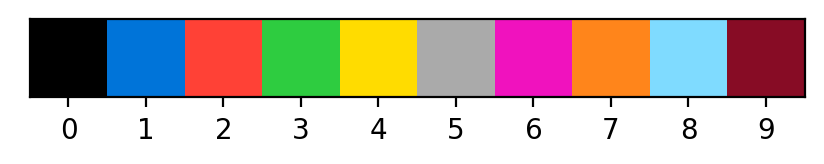

In [38]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [39]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [40]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [41]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [60]:
def Glue(List, r1, r2): #Combine tiles to one picture
    n1 = len(List[0])
    k1 = len(List[0][0])
    ans = np.zeros((n1*r1, k1*r2), dtype = int)
    counter = 0
    for i in range(r1):
        for j in range(r2):
            R = List[counter]
            counter +=1
            for t1 in range(n1):
                for t2 in range(k1):
                    ans[i*n1+t1, j*k1+t2] = 0 + R[t1][t2]
    
    return ans.tolist()

In [61]:
Evals[54]["train"][0]["input"]

[[0, 5, 0], [5, 5, 5], [0, 5, 0]]

In [64]:
def Solve_dim_map(basic_task): 

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    same_ratio = True
    R_x = []
    R_y = []
    dict1={}
    for x, y in zip(Input,Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        if n2%n1 != 0 or k2%k1 != 0:
            same_ratio = False
            break
        else :
            R_y.append(n2//n1)
            R_x.append(k2//k1)
       
    if same_ratio and min(R_x) == max(R_x) and min(R_y) == max(R_y): 
        r1 = min(R_y)
        r2 = min(R_x)
    else:
        return -1
    for x, y in zip(Input,Output):
        y_array=np.array(y)
        for i in range(len(x)):
            for j in range(len(x[0])):
                if x[i][j] not in dict1:
                    dict1[x[i][j]]=y_array[i*r1:(i+1)*r1,j*r2:(j+1)*r2]
                elif (dict1[x[i][j]]!=y_array[i*r1:(i+1)*r1,j*r2:(j+1)*r2]).any():
                    return -1
    
    res_list=[]
    for i in range(len(Test_Case)):
        for j in range(len(Test_Case[0])):
            if Test_Case[i][j] not in dict1:
                return -1
            else:
                res_list.append(dict1[Test_Case[i][j]].tolist())
    res=Glue(res_list,len(Test_Case),len(Test_Case[0]))

    return res
                


In [75]:
dict1={}
a=[[1,2],[3,4]]
dict1[str(a)]=1
dict1
str(a) in dict1.keys()

True

In [135]:

def Solve_dim_map_1(basic_task): 

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    same_ratio = True
    R_x = []
    R_y = []
    
    dict1={}
    dict2={}
    for x, y in zip(Input,Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        if n1%n2 != 0 or k1%k2 != 0:
            same_ratio = False
            break
        else :
            R_y.append(n1//n2)
            R_x.append(k1//k2)
    
       
    if same_ratio and min(R_x) == max(R_x) and min(R_y) == max(R_y): 
        r1 = min(R_y)
        r2 = min(R_x)
    else:
        return -1
    for x, y in zip(Input,Output):
        x_array=np.array(x)
        y_array=np.array(y)
        for i in range(len(y)):
            for j in range(len(y[0])):
                tmp=x_array[i*r1:(i+1)*r1,j*r2:(j+1)*r2]
                if str(tmp) not in dict1.keys():
                    dict1[str(tmp)]=y[i][j]
                    dict2[str(tmp)]=y[i][j]
                  
                    
                elif dict1[str(tmp)]!=y[i][j]:
                    
                    return -1


    res_list=[]
    for i in range(len(Test_Case)):
        for j in range(len(Test_Case[0])):
            Test_Case_array=np.array(Test_Case)
            tmp=Test_Case_array[i*r1:(i+1)*r1,j*r2:(j+1)*r2]
            if str(tmp) not in dict1.keys():
                
                return -1
            else:
                res_list.append([[dict1[str(tmp)]]])
    res=Glue(res_list,len(Test_Case),len(Test_Case[0]))

    return res

54 0


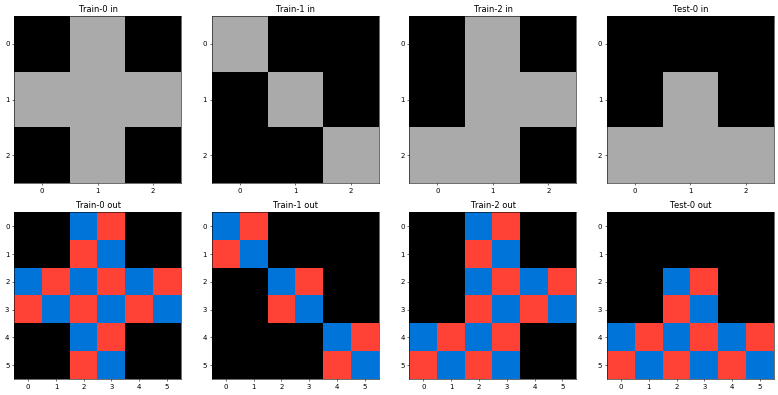

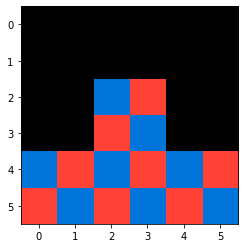

In [136]:
for i in range(400):

    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_dim_map(basic_task)
        if proposed_solution != -1 :
            print(i,j)
            plot_task(task)
            plot_picture(proposed_solution)


15 0


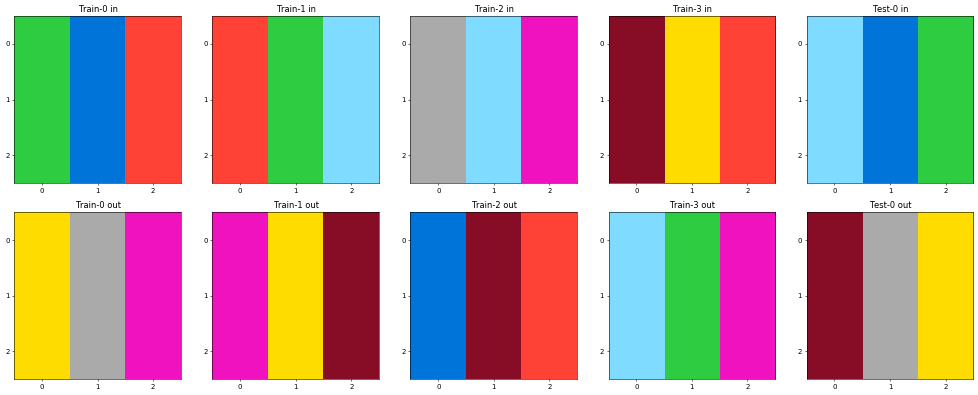

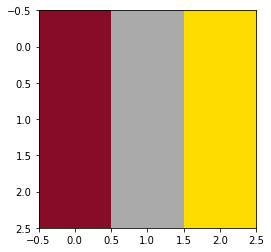

275 0


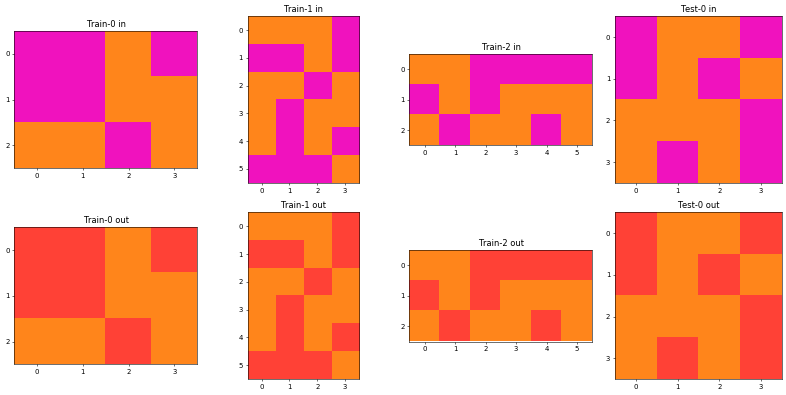

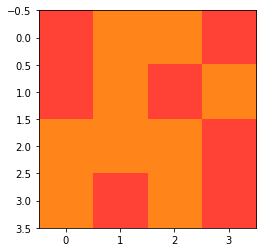

308 0


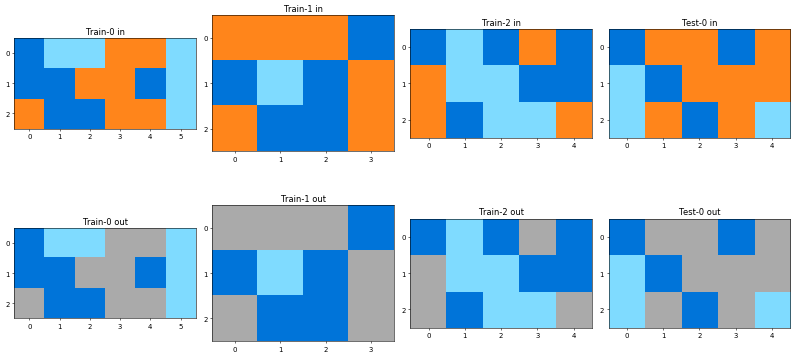

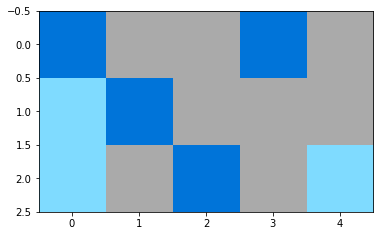

In [137]:
for i in range(400):

    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_dim_map_1(basic_task)
        if proposed_solution != -1 :
            print(i,j)
            plot_task(task)
            plot_picture(proposed_solution)
